#### TITLE
Advanced Regular Expressions


#### OBJECTIVE
* Several new regex syntax components to allow us to express more complex criteria.
* How to combine regular expression patterns to extract and transform data.
* How to replace and clean data using regular expressions.

#### DATASET
Learning regular expressions while performing analysis on a dataset of submissions to popular technology site [Hacker News](https://news.ycombinator.com/). The dataset we will be working with is based off this [CSV](https://www.kaggle.com/hacker-news/hacker-news-posts) of Hacker News stories from September 2015 to September 2016.

The columns in the dataset are explained below:
 
 
 | **Column**      | **Definition** |
| :---------- | :--------- |
| **id**  | The unique identifier from Hacker News for the story|
| **title**     | The title of the story|
| **url** |The URL that the stories links to, if the story has a URL|
| **num_points** | The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes|
| **num_comments**  |The number of comments that were made on the story|
| **author**     |The username of the person who submitted the story|
| **created_at** |The date and time at which the story was submitted|


#### INTRODUCTION

In [3]:
import pandas as pd

hn = pd.read_csv('./datasets/hacker_news.csv')
titles = hn['title']
titles.head()

0                            Interactive Dynamic Video
1    Florida DJs May Face Felony for April Fools' W...
2         Technology ventures: From Idea to Enterprise
3    Note by Note: The Making of Steinway L1037 (2007)
4    Title II kills investment? Comcast and other I...
Name: title, dtype: object

In [4]:
pattern = r"[Pp]ython"
python_counts = titles.str.contains(pattern).sum()
print(python_counts)

160


In [5]:
import re

pattern = r"python"
python_counts = titles.str.contains(pattern, flags=re.I).sum()
print(python_counts)

160


The ignorecase flag is particularly useful when we have many different capitalizations for a word or phrase. In our dataset, the SQL language has three different capitalizations: SQL, sql and Sql. To use sets to apture all of these variations, we would need to use a set for each character

In [12]:
pattern = r"[Ss][Qq][Ll]"
sqlcounts = titles.str.contains(pattern).sum()
print(sqlcounts)

108


In [15]:
import pandas as pd
import re

hn = pd.read_csv("./datasets/hacker_news.csv")
titles = hn['title']
sql_pattern = r"sql"
sql_count = titles.str.contains(sql_pattern, flags=re.I).sum()
sql_count

108

#### CAPTURE GROUPS
When we counted the number of mentions of 'SQL' in the titles of stories. To extract those mentions, we need to do two things:
1. Use the **Series.str.extract()** method
2. Use a regex capture group

We define a capture group by wrapping the part of our pattern we want to capture in parentheses. If we want to capture the whole pattern, we just wrap the whole pattern in a pair of parentheses

![title](./img/RegEx_16.png)

##### Use a capture group to create a frequency table of the different capitalizations of SQL in our dataset.

In [17]:
pattern = r"(SQL)"
sql_capitalizations = titles.str.extract(pattern, flags=re.I)
sql_capitalizations
sql_capitalizations_freq = sql_capitalizations.value_counts()
print(sql_capitalizations_freq)

SQL    101
Sql      4
sql      3
dtype: int64


This analysis can be extended, by looking at titles that have letters immediately before the "SQL", which is a convention often used to denote different variations or flavors of SQL

In [18]:
sqlpattern = r"(\w+SQL)"
sql_flavors = titles.str.extract(sqlpattern, flags=re.I)
sql_flavors_freq = sql_flavors.value_counts()
print(sql_flavors_freq)

PostgreSQL    27
NoSQL         16
MySQL         12
nosql          1
mySql          1
SparkSQL       1
MemSQL         1
CloudSQL       1
dtype: int64


Notice how there is some duplication due to varied capitalizations in this frequency table:
 * NoSQL and nosql
 * MySQL and mysql

Extract the mentions of different SQL flavors into a new column and clean those duplicates by making them all lowercase. Then analyze the results to look at the average number of comments for each flavor.

142     PostgreSQL
221         MemSQL
882     PostgreSQL
1160         NoSQL
1197    PostgreSQL
Name: flavor, dtype: object


<AxesSubplot:xlabel='flavor'>

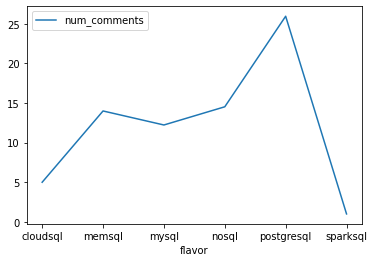

In [24]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+SQL)', re.I)
print(hn_sql['flavor'].head())
hn_sql['flavor'] = hn_sql['flavor'].str.lower()
sql_pivot = hn_sql.pivot_table(index='flavor', values='num_comments', aggfunc='mean')
sql_pivot.plot()

##### Using Capture Groups to Extract Data
Capture groups can also be useful to extract specific data from within our expression

A number is followed after the word 'Python', which indicates a version number. Sometimes a space precedes the number, sometimes it doesn't. We can use he following regular expression to match these cases:
![title](./img/RegEx_17.png)

We can use capture groups to extract the version of Python that is mentioned most often in our dataset by wrapping parentheses around the part of our regular expression which captures the version number.

##### Use a capture group to capture the version number after the word "Python", and then build a frequency table of the different versions.

In [35]:
pattern = r'[Pp]ython ([\d\.]+)'

py_versions = titles.str.extract(pattern)
py_versions_freq = dict(py_versions.value_counts())
py_versions_freq

{('3',): 10,
 ('3.5',): 3,
 ('2',): 3,
 ('3.6',): 2,
 ('8',): 1,
 ('4',): 1,
 ('3.5.0',): 1,
 ('2.7',): 1,
 ('1.5',): 1}

##### Counting Mentions of the 'C' Language


In [ ]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

first_10_matches(r"\b[Cc]\b")

However, we can quickly identify a few match types we want to prevent:
* Mentions of C++, a distinct language from C
* Cases where the letter C is followed by a period, like in the substring C.E.O

Let's use a negative set to prevent matces for the **+** character and the **.** character

In [41]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

# pattern = r"\b[Cc]\b"
pattern = r"\b[Cc]\b[^.+]"
first_ten = first_10_matches(pattern)
first_ten

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

#### LOOKAROUNDS

By using a negative set, we may have eliminated any instances where the last character of the title is "C"(the second last line of output matches in spite of the fact that it ends with C, because it also has C earlier in the string).

**Lookarounds** let us define a character or sequence of characters that either must or must not come before or after our regex match. 
There are four types of lookarounds:
![title](./img/LookArnd_1.png)

![title](./img/LookArnd_2.png)


In [43]:
test_cases = ['Red_Green_Blue',
              'Yellow_Green_Red',
              'Red_Green_Red',
              'Yellow_Green_Blue',
              'Green']

def run_test_cases(pattern):
    for tc in test_cases:
        result = re.search(pattern, tc)
        print(result or "NO MATCH")
        
#  positive lookahead, to include instances where the match is followed by the substring _Blue
run_test_cases(r"Green(?=_Blue)")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
NO MATCH


Notice how the matches themselves are purely the text Green and don't include the lookahead.

In [44]:
# negative lookahead to include instances where the match is not followed by the substring _Red
run_test_cases(r"Green(?!_Red)")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
<re.Match object; span=(0, 5), match='Green'>


In [45]:
# positive lookbehind to include instances where the match is preceded by the substring Red_
run_test_cases(r"(?<=Red_)Green")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH


In [46]:
 # negative lookbehind to include instances where the match isn't preceded by the substring Yellow_
run_test_cases(r"(?<!Yellow_)Green")  

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(0, 5), match='Green'>


The contents of a lookaround can include any other regular expression component.
For instance, here is an example where we match only cases that are followed by exactly five characters

In [47]:
run_test_cases(r"Green(?=.{5})")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
NO MATCH


<div class="burk">IMP</div><i class="fa fa-lightbulb-o "></i>
Sometimes programming languages won't implement support for all lookarounds (notably, lookbehinds are not in the official JavaScript specification). As an example, to get full support in the [RegExr](https://regexr.com/) tool, you'll need to set it to use the PCRE regex engine.

Let's now use lookarounds to exclude the matches we don't want. We want to:

* Keep excluding matches that are followed by . or +, but still match cases where "C" falls at the end of the sentence.
* Exclude matches that have the word 'Series' immediately preceding them.


In [48]:
pattern = r"(?<!Series\s)\b[Cc]\b((?![+.])|\.$)"
c_mentions = titles.str.contains(pattern).sum()
c_mentions

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


102

#### BACK-REFERENCES: Using Capture Groups in a RegEx Pattern
If we wanted to identify strings that had words with double letters, like the "ee" in "feed." Because we don't know ahead of time what letters might be repeated, we need a way to specify a capture group and then to repeat it. We can do this with **backreferences**. Whenever we have one or more capture groups, we can refer to them using integers left to right as shown in this regex that matches the string HelloGoodbye:
![title](./img/BackRef_1.png)

![title](./img/BackRef_2.png)

![title](./img/BackRef_3.png)

In [49]:
test_cases = [
              "I'm going to read a book.",
              "Green is my favorite color.",
              "My name is Aaron.",
              "No doubles here.",
              "I have a pet eel."
             ]

for tc in test_cases:
    print(re.search(r"(\w)\1", tc))

<re.Match object; span=(21, 23), match='oo'>
<re.Match object; span=(2, 4), match='ee'>
None
None
<re.Match object; span=(13, 15), match='ee'>


Notice that there was no match for the word Aaron, despite it containing a double "a." This is because the uppercase and lowercase "a" are two different characters, so the backreference does not match

In [50]:
test_cases = pd.Series(test_cases)
print(test_cases.str.contains(r"(\w)\1"))

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0     True
1     True
2    False
3    False
4     True
dtype: bool


In [52]:
pattern = r"\b(\w+)\s\1\b"

repeated_words = titles[titles.str.contains(pattern)]
repeated_words

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

#### Substituting Regular Expression Matches
When we learned to work with basic string methods, we used the str.replace() method to replace simple substrings. We can achieve the same with regular expressions using the re.sub() function. The basic syntax for re.sub() is:

**re.sub(pattern, repl, string, flags=0)**

The repl parameter is the text that you would like to substitute for the match. Let's look at a simple example where we replace all capital letters in a string with dashes:

In [53]:
string = "aBcDEfGHIj"

print(re.sub(r"[A-Z]", "-", string))

a-c--f---j


When working in pandas, we can use the Series.str.replace() method, which uses nearly identical syntax:

**Series.str.replace(pat, repl, flags=0)**

Earlier, we discovered that there were multiple different capitalizations for SQL in our dataset. Let's look at how we could make these uniform with the Series.str.replace() method and a regular expression:


In [54]:
sql_variations = pd.Series(["SQL", "Sql", "sql"])

sql_uniform = sql_variations.str.replace(r"sql", "SQL", flags=re.I)
print(sql_uniform)

0    SQL
1    SQL
2    SQL
dtype: object


Making all the different variations of "email" in the dataset uniform.

In [58]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])
pattern = r"\be[-\s]?mail"
email_uniform = email_variations.str.replace(pattern, "email", flags=re.I)
print(email_uniform)
titles_clean = titles.str.replace(pattern, "email", flags=re.I)
titles_clean.head()

0    email
1    email
2    email
3    email
4    email
5    email
6    email
7    email
8    email
dtype: object


0                            Interactive Dynamic Video
1    Florida DJs May Face Felony for April Fools' W...
2         Technology ventures: From Idea to Enterprise
3    Note by Note: The Making of Steinway L1037 (2007)
4    Title II kills investment? Comcast and other I...
Name: title, dtype: object

#### Extracting Domains from URL's
Extracting the different components of the URLs in order to analyze them. We'll start by extracting just the domains. Below is a list of some of the URLs in the dataset, with the domains highlighted in color, so you can see the part of the string we want to capture.
![title](./img/URLs_1.png)

The domain of each URL excludes the protocol (e.g. https://) and the page path (e.g. /Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429).

There are several ways that you could use regular expressions to extract the domain, but we suggest the following technique:

* Using a series of characters that will match the protocol.
* Inside a capture group, using a set that will match the character classes used in the domain.
* Because all of the URLs either end with the domain, or continue with page path which starts with / (a character not found in any domains), we don't need to cater for this part of the URL in our regular expression.

Once you have extracted the domains, you will be building a frequency table so we can determine the most popular domains. There are over 7,000 unique domains in our dataset, so to make the frequency table easier to analyze, we'll look at only the top 20 domains.

In [65]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r"https?://([\w\-\.]+)"

test_urls_clean = test_urls.str.extract(pattern, flags=re.I)
print(test_urls_clean )
domains = hn['url'].str.extract(pattern, flags=re.I)
top_domains = domains.value_counts().head(5)
top_domains

                                  0
0                    www.amazon.com
1   www.interactivedynamicvideo.com
2                   www.nytimes.com
3                     evonomics.com
4                        github.com
5                          phys.org
6                      iot.seeed.cc
7                  www.bfilipek.com
8             beta.crowdfireapp.com
9                      www.valid.ly
10        css-cursor.techstream.org


github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
dtype: int64

Having extracted just the domains from the URLs, on this final screen we'll extract each of the three component parts of the URLs:
1. Protocol
2. Domain
3. Page path

![title](./img/URLs_2.png)
We'll create a regular expression with multiple capture groups. Multiple capture groups in regular expressions are defined the same way as single capture groups — using pairs of parentheses.

![title](./img/URLs_3.png)
Notice how we put a space character between the capture groups, which matches the space character in the original strings.

In [69]:
created_at = hn['created_at'].head()
print(created_at)

pattern = r"(.+)\s(.+)"
dates_times = created_at.str.extract(pattern)
print(dates_times)

0     8/4/2016 11:52
1    6/23/2016 22:20
2     6/17/2016 0:01
3     9/30/2015 4:12
4    10/31/2015 9:48
Name: created_at, dtype: object
            0      1
0    8/4/2016  11:52
1   6/23/2016  22:20
2   6/17/2016   0:01
3   9/30/2015   4:12
4  10/31/2015   9:48


In [70]:
pattern = r"(https?)://([\w\.\-]+)/?(.*)"

test_url_parts = test_urls.str.extract(pattern, flags=re.I)
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...
